In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Book3.xlsx')

In [3]:
df.head()

,id,trans_type,trans_ref,status,ppan,cts,bsb,account_no,indicator,trans_code,...,remitter_name,withhold_tax_amount,trans_data_id,stan,post_date,approval_code,hold_number,exchange_rate,ext_trans_no,error_msg
0,107070,Credit purchase,107069,SUCCESS,482003SUYTIR3399,2021-05-17,NaN,NaN,NaN,206,...,NaN,NaN,106741.0,NaN,2021-07-08,713314,NaN,1.0,NaN,NaN
1,107069,Credit purchase,107068,SUCCESS,482003SUYTIR3399,2021-05-17,NaN,NaN,NaN,206,...,NaN,NaN,106740.0,NaN,2021-07-08,713314,NaN,1.0,NaN,NaN
2,107068,Credit purchase,107067,SUCCESS,482003SUYTIR3399,2021-05-17,NaN,NaN,NaN,206,...,NaN,NaN,106739.0,NaN,2021-07-08,713314,NaN,1.0,NaN,NaN
3,107067,Credit purchase,107066,SUCCESS,482003SUYTIR3399,2021-05-17,NaN,NaN,NaN,206,...,NaN,NaN,106738.0,NaN,2021-07-08,713314,NaN,1.0,NaN,NaN
4,105259,Purchase,105258,SUCCESS,482003VGLNRQ6502,2021-06-30,NaN,NaN,NaN,205,...,NaN,NaN,104942.0,NaN,2021-07-02,282186,958574586.0,1.0,NaN,NaN


In [4]:
df.shape

(94229, 26)

In [5]:
df.dtypes

id                              int64
trans_type                     object
trans_ref                       int64
status                         object
ppan                           object
cts                    datetime64[ns]
bsb                            object
account_no                     object
indicator                     float64
trans_code                     object
currency                       object
amount                        float64
description                    object
lodgement_ref                  object
remitter_bsb                   object
remitter_account_no           float64
remitter_name                  object
withhold_tax_amount           float64
trans_data_id                 float64
stan                          float64
post_date              datetime64[ns]
approval_code                  object
hold_number                   float64
exchange_rate                 float64
ext_trans_no                   object
error_msg                      object
dtype: objec

In [6]:
df.columns

Index(['id', 'trans_type', 'trans_ref', 'status', 'ppan', 'cts', 'bsb',
       'account_no', 'indicator', 'trans_code', 'currency', 'amount',
       'description', 'lodgement_ref', 'remitter_bsb', 'remitter_account_no',
       'remitter_name', 'withhold_tax_amount', 'trans_data_id', 'stan',
       'post_date', 'approval_code', 'hold_number', 'exchange_rate',
       'ext_trans_no', 'error_msg'],
      dtype='object')

<AxesSubplot:>

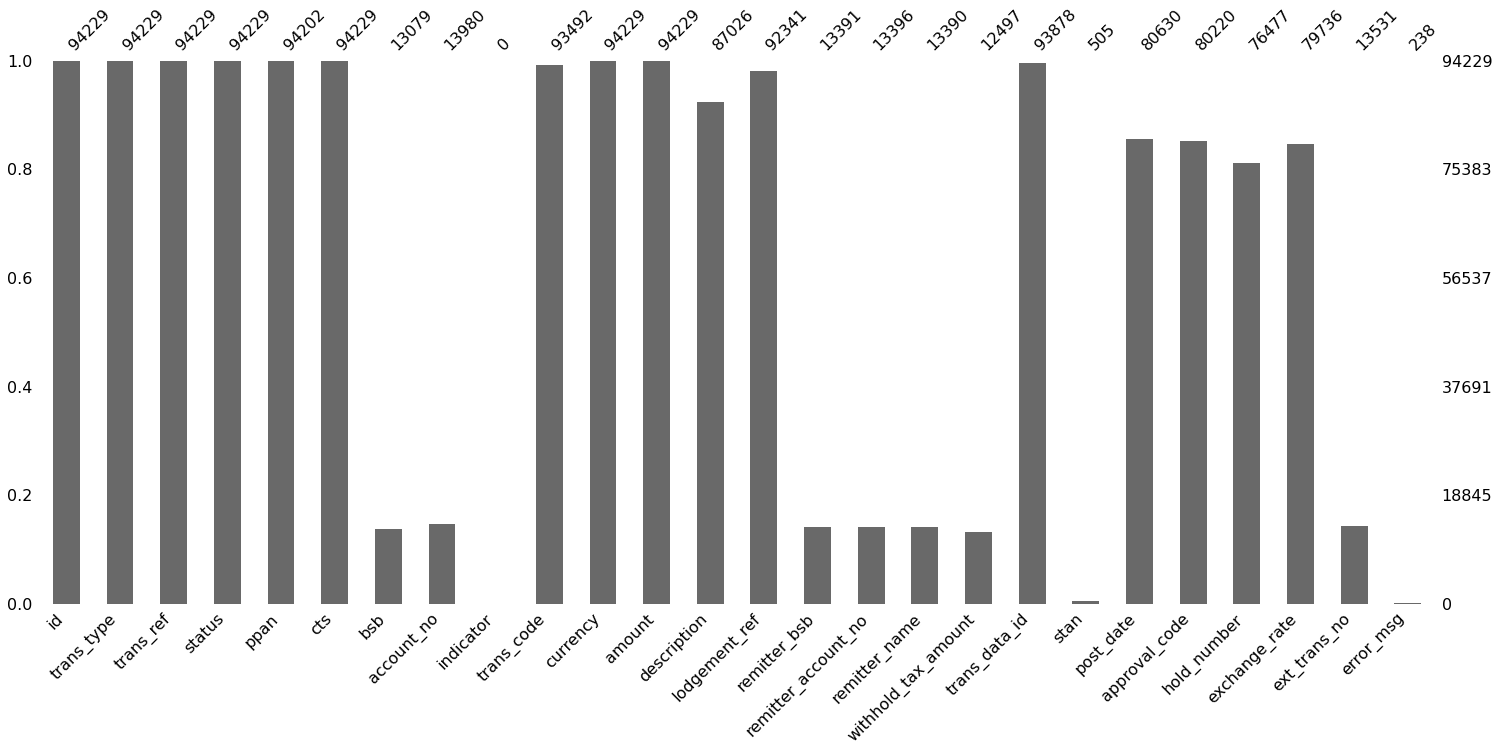

In [7]:
import missingno as msno
msno.bar(df)

In [8]:
df.isnull().sum()

id                         0
trans_type                 0
trans_ref                  0
status                     0
ppan                      27
cts                        0
bsb                    81150
account_no             80249
indicator              94229
trans_code               737
currency                   0
amount                     0
description             7203
lodgement_ref           1888
remitter_bsb           80838
remitter_account_no    80833
remitter_name          80839
withhold_tax_amount    81732
trans_data_id            351
stan                   93724
post_date              13599
approval_code          14009
hold_number            17752
exchange_rate          14493
ext_trans_no           80698
error_msg              93991
dtype: int64

In [9]:
df=df.drop(['id','bsb','account_no','indicator', 'remitter_bsb', 'remitter_account_no','withhold_tax_amount',
       'remitter_name', 'trans_data_id', 'stan',
       'ext_trans_no', 'error_msg'], axis = 1)

In [10]:
df.head()

,trans_type,trans_ref,status,ppan,cts,trans_code,currency,amount,description,lodgement_ref,post_date,approval_code,hold_number,exchange_rate
0,Credit purchase,107069,SUCCESS,482003SUYTIR3399,2021-05-17,206,AUD,251.0,NEXT DIRECTORY \INTERNET \GB,74697691189920000901120.0,2021-07-08,713314,NaN,1.0
1,Credit purchase,107068,SUCCESS,482003SUYTIR3399,2021-05-17,206,AUD,251.0,NEXT DIRECTORY \INTERNET \GB,74697691189920000901120.0,2021-07-08,713314,NaN,1.0
2,Credit purchase,107067,SUCCESS,482003SUYTIR3399,2021-05-17,206,AUD,67.0,NEXT DIRECTORY \INTERNET \GB,74697691189920000901120.0,2021-07-08,713314,NaN,1.0
3,Credit purchase,107066,SUCCESS,482003SUYTIR3399,2021-05-17,206,AUD,64.0,NEXT DIRECTORY \INTERNET \GB,74697691189920000901120.0,2021-07-08,713314,NaN,1.0
4,Purchase,105258,SUCCESS,482003VGLNRQ6502,2021-06-30,205,AUD,275.0,BATTERY WORLD GAWLER \GAWLER SOUTH \AU,74564721182324799045632.0,2021-07-02,282186,958574586.0,1.0


In [11]:
df.shape

(94229, 14)

In [12]:
df = df.fillna(df.mode().iloc[0])

In [13]:
df.amount.describe()

count     94229.000000
mean        177.166413
std        1281.274306
min          -2.000000
25%          12.500000
50%          40.000000
75%         100.000000
max      325105.000000
Name: amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

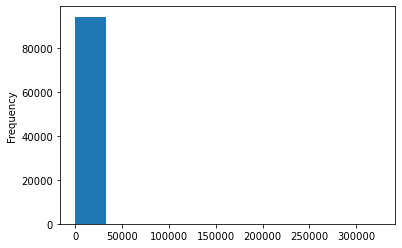

In [14]:
df.amount.plot(kind="hist")

In [15]:
df['time']= pd.to_datetime(df['cts'])

In [16]:
df["month"]=df['time'].dt.month

In [17]:
df.head()

,trans_type,trans_ref,status,ppan,cts,trans_code,currency,amount,description,lodgement_ref,post_date,approval_code,hold_number,exchange_rate,time,month
0,Credit purchase,107069,SUCCESS,482003SUYTIR3399,2021-05-17,206,AUD,251.0,NEXT DIRECTORY \INTERNET \GB,74697691189920000901120.0,2021-07-08,713314,928991432.0,1.0,2021-05-17,5
1,Credit purchase,107068,SUCCESS,482003SUYTIR3399,2021-05-17,206,AUD,251.0,NEXT DIRECTORY \INTERNET \GB,74697691189920000901120.0,2021-07-08,713314,928991432.0,1.0,2021-05-17,5
2,Credit purchase,107067,SUCCESS,482003SUYTIR3399,2021-05-17,206,AUD,67.0,NEXT DIRECTORY \INTERNET \GB,74697691189920000901120.0,2021-07-08,713314,928991432.0,1.0,2021-05-17,5
3,Credit purchase,107066,SUCCESS,482003SUYTIR3399,2021-05-17,206,AUD,64.0,NEXT DIRECTORY \INTERNET \GB,74697691189920000901120.0,2021-07-08,713314,928991432.0,1.0,2021-05-17,5
4,Purchase,105258,SUCCESS,482003VGLNRQ6502,2021-06-30,205,AUD,275.0,BATTERY WORLD GAWLER \GAWLER SOUTH \AU,74564721182324799045632.0,2021-07-02,282186,958574586.0,1.0,2021-06-30,6


<AxesSubplot:xlabel='month', ylabel='count'>

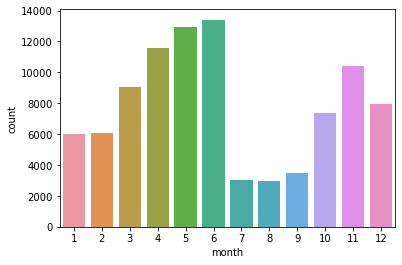

In [18]:
sns.countplot(df['month'])

In [19]:
amount = df.groupby('month')['amount'].sum()
amount = amount.sort_values(ascending=False)
month = amount[1:11].index

amount = amount[1:11].values 



data = pd.DataFrame({'month': month, 'Total amount': amount})
print(data)

   month  Total amount
0      4   2509825.662
1      5   2351374.944
2      3   1910228.222
3     11   1762012.860
4     12   1361509.295
5     10   1175249.980
6      2   1084722.504
7      1    741654.835
8      9    382944.100
9      8    339317.610


Text(0.5, 1.0, 'Amount of transaction happening each month')

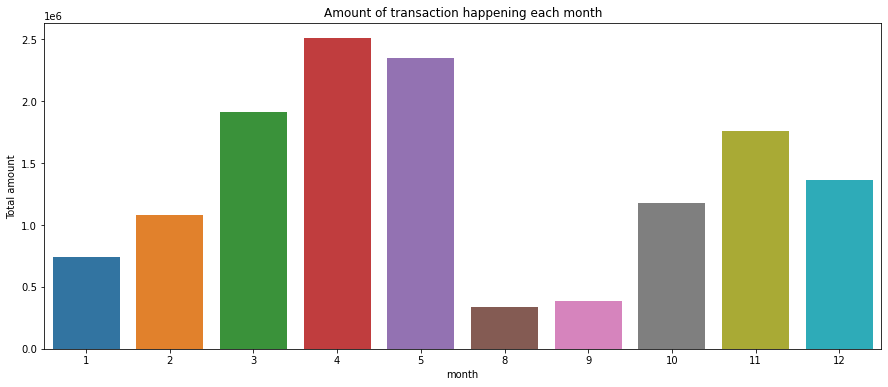

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(x="month", y="Total amount", data=data)
plt.title("Amount of transaction happening each month")

In [21]:
df["day"]=df['time'].dt.day


amount = df.groupby('day')['amount'].sum()
amount = amount.sort_values(ascending=False)
day = amount[1:11].index

amount = amount[1:11].values 



data = pd.DataFrame({'day': day, 'Total amount': amount})
print(data)

   day  Total amount
0   22    760827.231
1    3    751537.820
2    4    660640.900
3   24    657937.840
4   29    641028.020
5   11    614465.532
6   19    608272.110
7   10    579313.867
8   16    576490.472
9   23    569922.550


Text(0.5, 1.0, 'Amount of transaction happening each day')

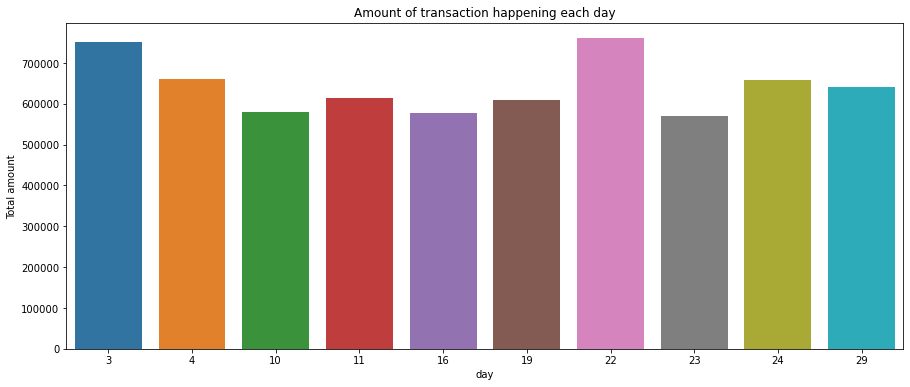

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x="day", y="Total amount", data=data)
plt.title("Amount of transaction happening each day")

In [23]:
Month= []

for i in df['month']:
  if (i == 1 or i==2 or i == 8 or i==9):
    Month.append("Anomaly")

  else:
    Month.append("not anomaly")

In [24]:
df['Month'] = Month

In [25]:
df=df.drop(['cts','time','post_date'], axis = 1)

In [26]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [27]:
features = df.loc[:, df.columns != 'Month']
target= df['Month'] 
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features,target,test_size=0.3, random_state=0, stratify=df.Month)

In [28]:
X_train

,trans_type,trans_ref,status,ppan,trans_code,currency,amount,description,lodgement_ref,approval_code,hold_number,exchange_rate,month,day
38115,2,56346,3,2036,1,1,1500.00,11190,954,0,928991432.0,1.0,3,18
73940,10,20461,3,225,4,1,70.97,6132,19844,9431,830013431.0,1.0,10,29
85912,10,8489,3,2211,4,1,76.55,3307,23769,66875,776725017.0,1.0,8,11
27792,10,66669,3,2953,4,1,266.94,7908,7444,4785,929423028.0,1.0,4,16
80624,10,13777,3,2596,4,1,251.40,13460,21747,17965,807427255.0,1.0,9,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,10,96707,3,505,4,1,205.00,11360,2349,48664,950116820.0,1.0,6,10
6317,2,98427,3,2035,1,1,654.25,16303,1843,0,928991432.0,1.0,6,16
87598,10,6632,3,2694,4,1,45.00,20819,24433,32776,765831188.0,1.0,7,23
6127,10,98617,3,150,4,1,2.50,5203,1786,38392,945664376.0,1.0,5,28


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
decision_tree = DecisionTreeClassifier()
model = decision_tree.fit(X_train, y_train)


In [32]:
pred=model.predict(X_test)

from sklearn.metrics import classification_report

In [52]:
y_test

27684    1
74597    1
31906    1
51175    0
25692    1
        ..
73766    1
75947    1
64043    1
45083    0
88256    1
Name: Month, Length: 28269, dtype: int8

In [53]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5563
           1       1.00      1.00      1.00     22706

    accuracy                           1.00     28269
   macro avg       1.00      1.00      1.00     28269
weighted avg       1.00      1.00      1.00     28269



In [34]:
pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

In [75]:
X_pred = pd.DataFrame()

In [76]:
X_pred['real']=y_test.values

In [77]:
X_pred['pred']=pred

In [78]:
X_pred.head()

,real,pred
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


<AxesSubplot:xlabel='pred', ylabel='count'>

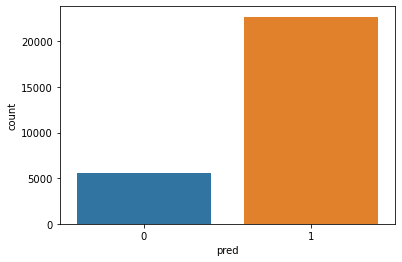

In [79]:
sns.countplot(X_pred['pred'])

In [ ]:
# 0 is anomaly and 1 is not anomaly